# A Data Science Case Study with Python: part 4

## Relationships between numerical columns

Make sure you are familiar with Chapters 1 & 2 of Nathan George's book [Practical Data Science with
Python](https://www.packtpub.com/product/practical-data-science-with-python/9781801071970) before diving into this notebook.

We work with the City of Montreal 311 data set. This is the third notebook in a sequence; please start with the first part if you landed here via some other route. regardless, we will reload the data in the first cells.

In [124]:
import os.path 
filename = 'requetes311.csv' # filename 
if os.path.isfile(filename): # file exists
    print('We have the data at hand.') # what to print out if it does
else: # and what to do if not
    print('ERROR: Please download the data and put it in this same directory')

We have the data at hand.


Now, we load the data into a Pandas data frame and see what we got in terms of rows and columns. Since this is a rather large file, this might take a while. Be patient.

In [125]:
import pandas as pd # install with pip if you haven't yet
print('Attempting to load the data. (Do NOT click run again, this takes some time.)')
data = pd.read_csv(filename, low_memory = False)

Attempting to load the data. (Do NOT click run again, this takes some time.)


Let's get a refresher on what columns the data set contains.

In [126]:
rows, cols = data.shape
for (c, i) in zip(data.columns, range(cols)): # iterate over the contents of the header with a for loop
    print(f'Column at index {i} is called {c}')

Column at index 0 is called ID_UNIQUE
Column at index 1 is called NATURE
Column at index 2 is called ACTI_NOM
Column at index 3 is called TYPE_LIEU_INTERV
Column at index 4 is called RUE
Column at index 5 is called RUE_INTERSECTION1
Column at index 6 is called RUE_INTERSECTION2
Column at index 7 is called LOC_ERREUR_GDT
Column at index 8 is called ARRONDISSEMENT
Column at index 9 is called ARRONDISSEMENT_GEO
Column at index 10 is called LIN_CODE_POSTAL
Column at index 11 is called DDS_DATE_CREATION
Column at index 12 is called PROVENANCE_ORIGINALE
Column at index 13 is called PROVENANCE_TELEPHONE
Column at index 14 is called PROVENANCE_COURRIEL
Column at index 15 is called PROVENANCE_PERSONNE
Column at index 16 is called PROVENANCE_COURRIER
Column at index 17 is called PROVENANCE_TELECOPIEUR
Column at index 18 is called PROVENANCE_INSTANCE
Column at index 19 is called PROVENANCE_MOBILE
Column at index 20 is called PROVENANCE_MEDIASOCIAUX
Column at index 21 is called PROVENANCE_SITEINTE

We have not done anything with those `PROVENANCE` columns yet that indicate the ways in which the incident in question has been reported. A quick reminder as to what they contain:

['PROVENANCE_ORIGINALE', 'PROVENANCE_TELEPHONE', 'PROVENANCE_COURRIEL', 'PROVENANCE_PERSONNE', 'PROVENANCE_COURRIER', 'PROVENANCE_TELECOPIEUR', 'PROVENANCE_INSTANCE', 'PROVENANCE_MOBILE', 'PROVENANCE_MEDIASOCIAUX', 'PROVENANCE_SITEINTERNET']


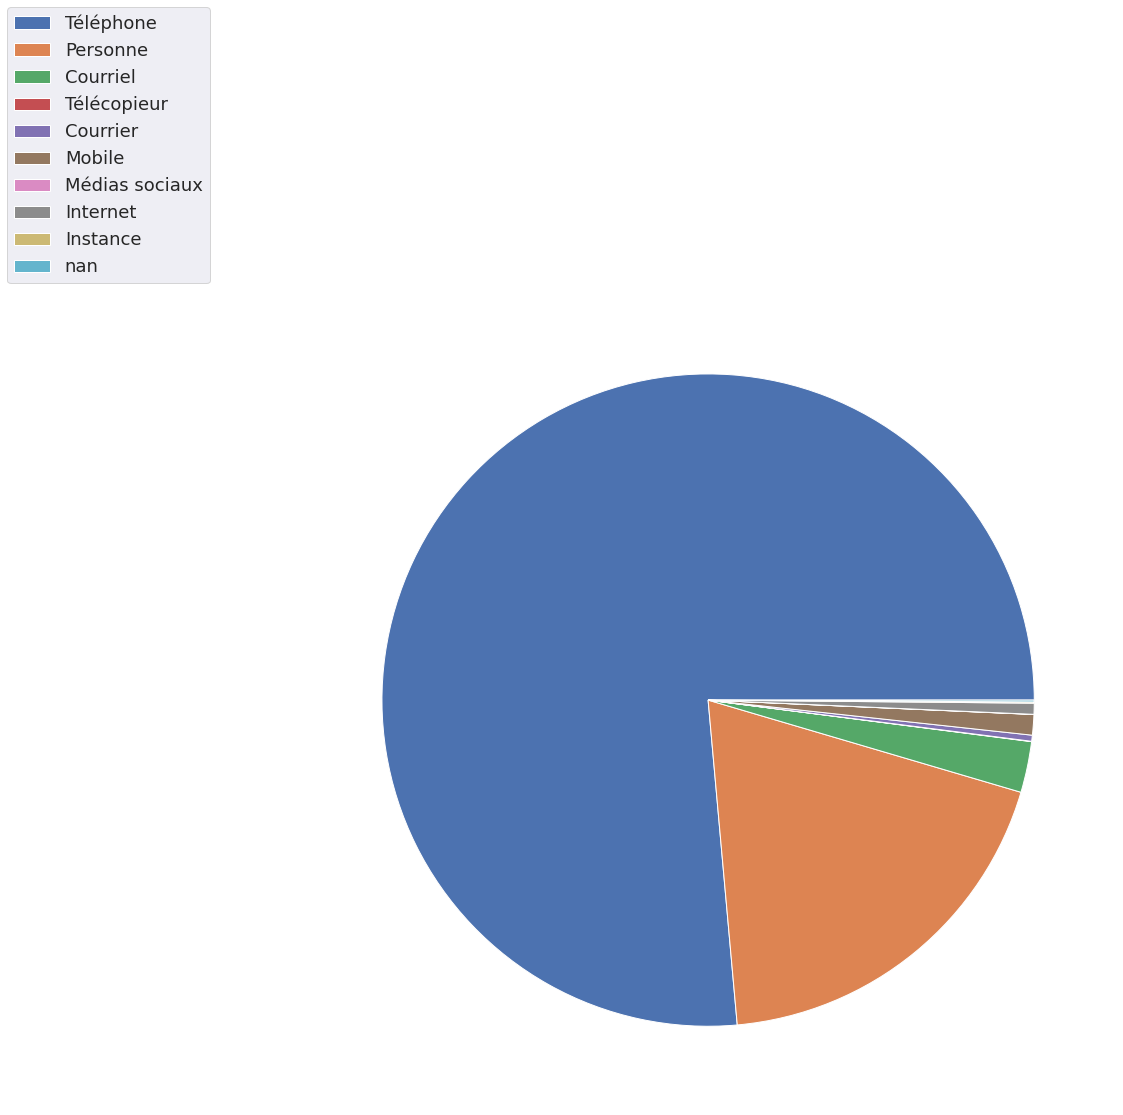

In [127]:
data.tail()
prov = [ col for col in data.columns if 'PROVENANCE' in col ] # which columns are these
print(prov)
from collections import Counter
c = Counter(data[prov[0]])
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [ 20, 15 ] # bigger plots
font = { 'size'   : 20 } # bigger font
plt.rc('font', **font)
patches, texts = plt.pie(c.values())
plt.legend(patches, c.keys(), loc = 'lower right', 
           bbox_to_anchor = (-0.1, 1.), fontsize = 18)

Note that `nan` refers to *no valid value given*.

The first `PROVENANCE` column indicates how the record was first created. The others are counters on the number of times the record was reported through different media.

In [129]:
prov = prov[1:] # examine just the numerical ones
from scipy.stats import describe
pd.options.display.float_format = '{:.2f}'.format # no scientific format, two decimal places
for col in prov:
    print(data[col].describe())
    print('\n\n')

count   4635093.00
mean          0.03
std           0.19
min           0.00
25%           0.00
50%           0.00
75%           0.00
max          40.00
Name: PROVENANCE_COURRIEL, dtype: float64



count   4635093.00
mean          0.20
std           0.44
min           0.00
25%           0.00
50%           0.00
75%           0.00
max          29.00
Name: PROVENANCE_PERSONNE, dtype: float64



count   4635093.00
mean          0.00
std           0.06
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           6.00
Name: PROVENANCE_COURRIER, dtype: float64



count   4635093.00
mean          0.00
std           0.02
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           5.00
Name: PROVENANCE_TELECOPIEUR, dtype: float64



count   4635093.00
mean          0.00
std           0.03
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           4.00
Name: PROVENANCE_INSTANCE, dtype: float64



count   4635

Let's figure out if the numeric ones are correlated.

In [130]:
origin = data[prov[1:]] # keep just the numeric ones so that we get a smaller dataframe
origin.head()
print(origin.shape)

(4635093, 7)


Four million and then some might be a bit much to analyze. Maybe we could just focus on reports *created* during the year 2019.

In [131]:
data['timestamp'] =  pd.to_datetime(data['DDS_DATE_CREATION'], infer_datetime_format = True)
year = data[data['timestamp'].dt.year == 2019]
origin = year[prov[1:]] # keep just the numeric ones so that we get a smaller dataframe
print(origin.shape)

(739980, 7)


This makes us a smaller dataframe with only the columns with the source counters and the rows that correspond to records created in 2019. The column names are a bit redundantly long now: we can get rid of that repeating `PROVENANCE_` in them.

In [132]:
shorter = { p : p.replace('PROVENANCE_', '') for p in prov }
print(shorter)
origin = origin.rename(columns = shorter)
origin.head()

{'PROVENANCE_COURRIEL': 'COURRIEL', 'PROVENANCE_PERSONNE': 'PERSONNE', 'PROVENANCE_COURRIER': 'COURRIER', 'PROVENANCE_TELECOPIEUR': 'TELECOPIEUR', 'PROVENANCE_INSTANCE': 'INSTANCE', 'PROVENANCE_MOBILE': 'MOBILE', 'PROVENANCE_MEDIASOCIAUX': 'MEDIASOCIAUX', 'PROVENANCE_SITEINTERNET': 'SITEINTERNET'}


,PERSONNE,COURRIER,TELECOPIEUR,INSTANCE,MOBILE,MEDIASOCIAUX,SITEINTERNET
0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0
43,0,0,0,0,0,0,0


The rows that only have zeroes are of no interest, though.

In [133]:
content = origin.loc[~(origin == 0).all(axis = 1)]
print(content.shape)
content.head()

(177519, 7)


,PERSONNE,COURRIER,TELECOPIEUR,INSTANCE,MOBILE,MEDIASOCIAUX,SITEINTERNET
44,1,0,0,0,0,0,0
231,1,0,0,0,0,0,0
702,1,0,0,0,0,0,0
729,1,0,0,0,0,0,0
1057,1,0,0,0,0,0,0


Hey, these seem to be all one or zero. Let's examine that assumption further.

In [134]:
print(content.sum(axis = 1).value_counts())

1     169177
2       6108
3       1412
4        474
5        172
6         76
7         49
9         17
8         14
10         6
11         6
12         2
29         1
14         1
15         1
23         1
25         1
47         1
dtype: int64


So, they are not **all** just one source, but most are. Then again, we know that some of the record identifiers in the column `ID_UNIQUE` repeated so we may wish to combine the counters that share the same ID.

In [135]:
subset = year[['ID_UNIQUE'] + prov[1:]] # keep the ID
print('Kept columns', subset.columns)
print('Shape before combining', subset.shape)
combined = subset.groupby('ID_UNIQUE').sum()
print('Shape after combining', combined.shape)

Kept columns Index(['ID_UNIQUE', 'PROVENANCE_PERSONNE', 'PROVENANCE_COURRIER',
       'PROVENANCE_TELECOPIEUR', 'PROVENANCE_INSTANCE', 'PROVENANCE_MOBILE',
       'PROVENANCE_MEDIASOCIAUX', 'PROVENANCE_SITEINTERNET'],
      dtype='object')
Shape before combining (739980, 8)
Shape after combining (390501, 7)


Much fewer now that they were combined. We still want to get rid of the ones that only contain zeroes in the counter columns.

In [136]:
counters = combined[prov[1:]]
noblank = counters.loc[~(counters == 0).all(axis = 1)] # remove blanks
print('Shape after pruning blanks', noblank.shape)
print(noblank.sum(axis = 1).value_counts())

Shape after pruning blanks (112108, 7)
1     103766
2       6108
3       1412
4        474
5        172
6         76
7         49
9         17
8         14
10         6
11         6
12         2
29         1
14         1
15         1
23         1
25         1
47         1
dtype: int64


The records that only have *one report* are not potential sources of correlations between reporting channels and they are a majority, so let's prune those out as well to pursue our goal.

In [137]:
sources = noblank.sum(axis = 1)
multi = noblank.loc[sources != 1] # remove singletons
print(multi.sum(axis = 1).value_counts())

2     6108
3     1412
4      474
5      172
6       76
7       49
9       17
8       14
11       6
10       6
12       2
23       1
29       1
14       1
25       1
15       1
47       1
dtype: int64


Now we can move on with figuring out whether reporting through specific pairs of channels has some relations.

We compute and place the correlations with an [auxiliary function](https://stackoverflow.com/a/50835066).

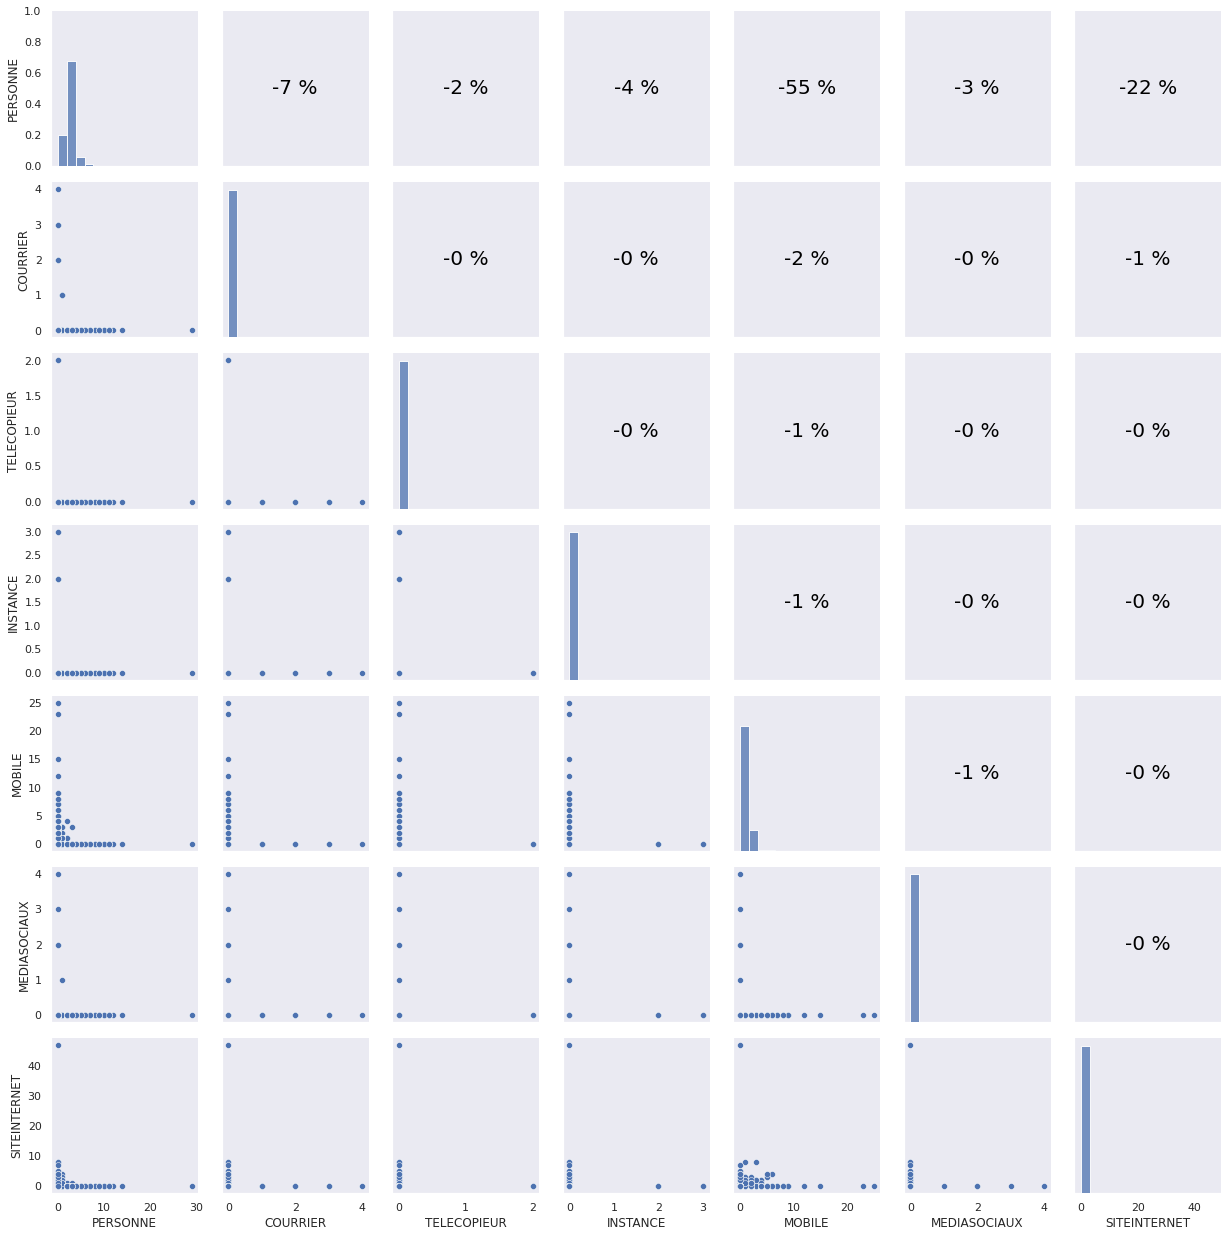

In [162]:
multi = multi.rename(columns = shorter)
font = { 'size'   : 12 } 
plt.rc('font', **font)
import seaborn as sns # install with pip if you have not done so yet
sns.set(style = 'dark')

from scipy.stats import pearsonr

def pcor(x, y, ax = None, **kws):
    r, _ = pearsonr(x, y)
    r *= 100 # percentage
    ax = ax or plt.gca()
    ax.annotate(f'{r:.0f} %', 
                xy = (0.5, 0.5), xycoords = 'axes fraction', 
                ha = 'center', va = 'center',
                color = 'black', size = 20)
    
info = sns.PairGrid(multi)
info.map_upper(pcor) # add correlations above the diagonal
info.map_lower(sns.scatterplot) # scatter plots below the diagonal
info.map_diag(sns.histplot) # histograms on the diagonal

Not a lot going on here in terms of correlations. The amount ofreports made in person per incident negatively correlate with the amount of reports made on mobile or online, but it is not a very strong linear relation.

What if we want to know which types of reports these are? We have to go back and retain the column `NATURE`.
Do all the records corresponding to one same ID share the value of the value of `NATURE`, though?

In [163]:
s2 = year[['ID_UNIQUE', 'NATURE'] + prov[1:]] # keep also the kind of the report
print('Examination commences')
for label, members in s2.groupby('ID_UNIQUE'):
    kinds = set(members['NATURE'])
    k = len(kinds)
    if k > 1:
        print(f'ID {label} corresponds to {k} types:', ' '.join(kinds))
print('Examination finished')

Examination commences
Examination finished


At least during 2019 there were no cases of multiple values of `NATURE` associated to any unique ID.

In [164]:
whatToDo = dict.fromkeys(s2, 'sum') # we want to add up the counters
whatToDo['NATURE'] = 'first' # that does not apply to the kind, keep the first (assuming this is invariant)
s3 = s2.groupby('ID_UNIQUE').agg(whatToDo) 
s3 = s3.drop(columns = 'ID_UNIQUE') # we do not need this anymore
s3.head()

,NATURE,PROVENANCE_PERSONNE,PROVENANCE_COURRIER,PROVENANCE_TELECOPIEUR,PROVENANCE_INSTANCE,PROVENANCE_MOBILE,PROVENANCE_MEDIASOCIAUX,PROVENANCE_SITEINTERNET
ID_UNIQUE,,,,,,,,
15-94533-B,Requete,0,0,0,0,0,0,0
18-162324-B,Requete,0,0,0,0,0,0,0
18-312343-A,Requete,0,0,0,0,0,0,0
19-1,Requete,0,0,0,0,0,0,0
19-10,Requete,0,0,0,0,0,0,0


Remember how everything tends to be a `Requete`?

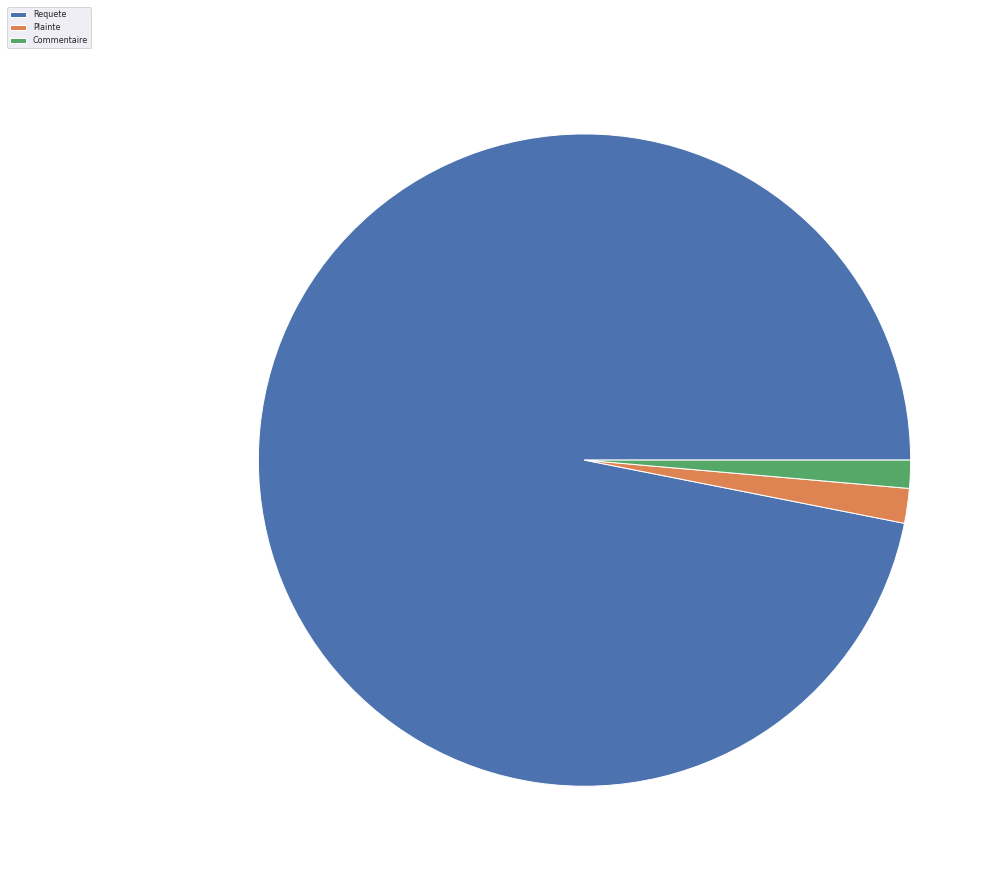

In [165]:
from collections import Counter
c = Counter(s3['NATURE'])
patches, texts = plt.pie(c.values())
plt.legend(patches, c.keys(), loc = 'lower right', 
           bbox_to_anchor = (-0.1, 1.), fontsize = 8)

Let's just draw the two underdog categories so that we can actually see them. But now, since we have this strong filter, we can stop filtering by year and just grab it all.

In [166]:
underdogs = data.drop(data[(data.NATURE == 'Requete')].index)
part = underdogs[['ID_UNIQUE', 'NATURE'] + prov[1:]] 
unique = part.groupby('ID_UNIQUE').agg(whatToDo) 
unique.drop(columns = 'ID_UNIQUE', inplace = True) 
print(unique.shape)

(58606, 8)


(379, 8)


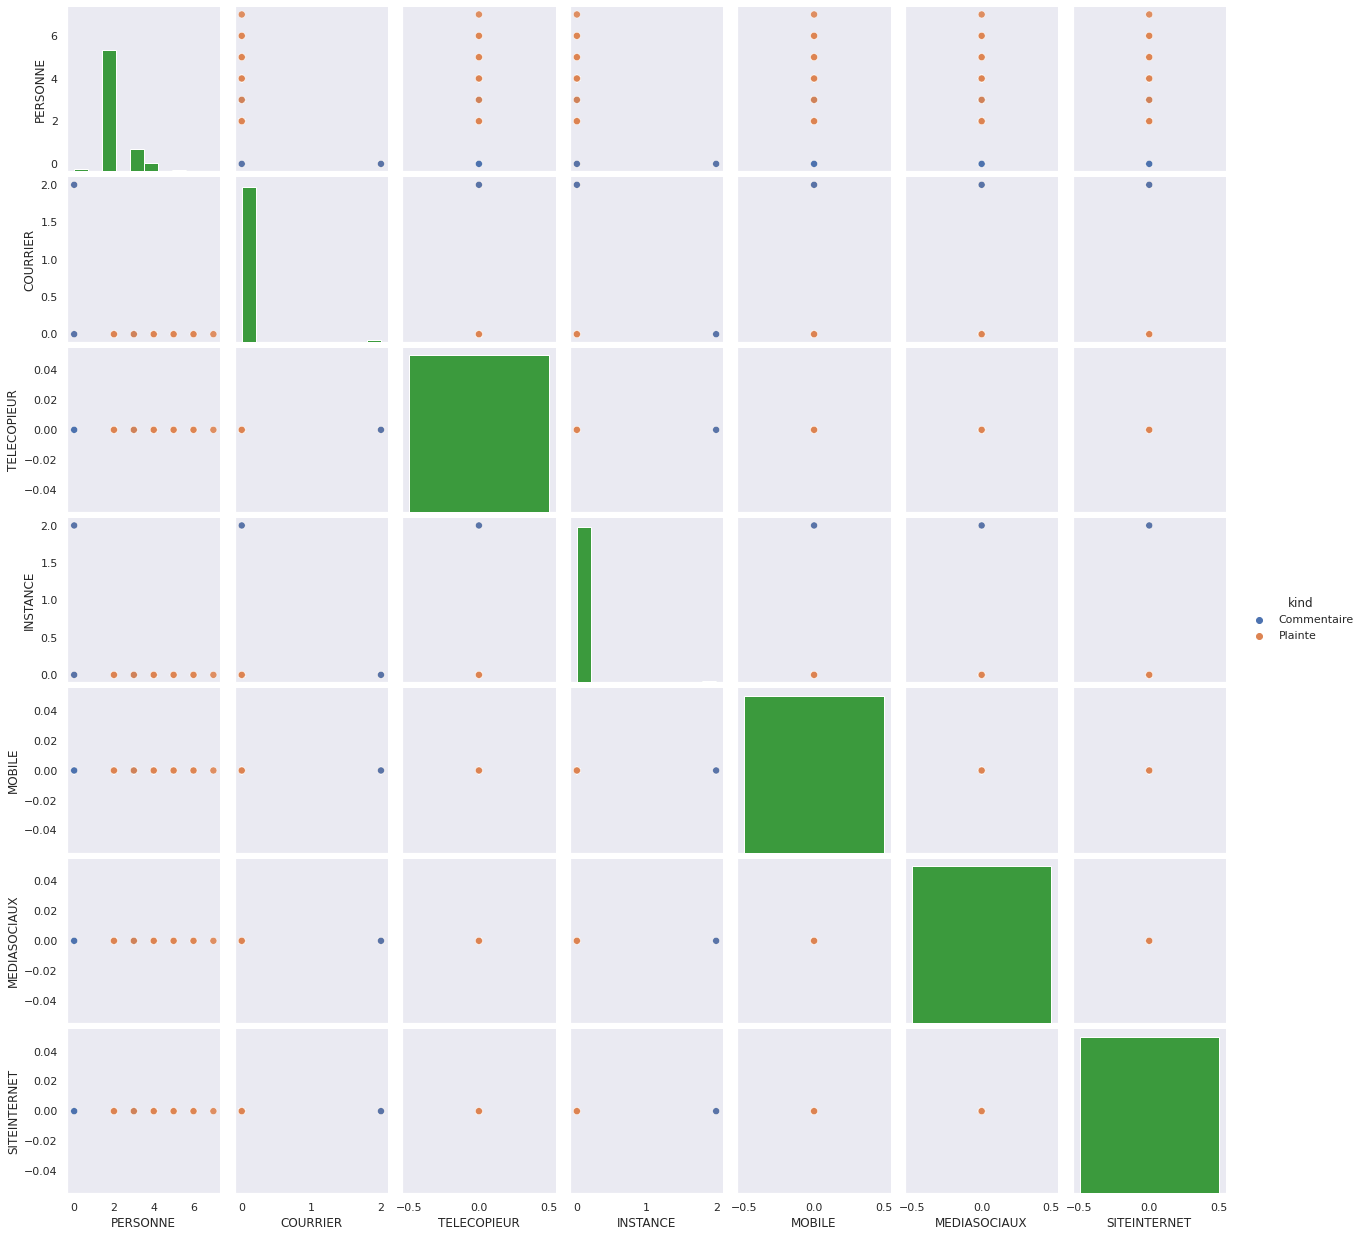

In [167]:
twoOrMore = unique[prov[1:]].sum(axis = 1) # we still need to get rid of reports with zero or one source counts
kept = unique.loc[twoOrMore > 1] # at least two reports
print(kept.shape)
shorter['NATURE'] = 'kind'
kept = kept.rename(columns = shorter)
font = { 'size'   : 12 } 
plt.rc('font', **font)
sns.set(style = 'dark')
sns.pairplot(kept, hue = 'kind', kind = 'scatter', diag_kind = 'hist', 
             diag_kws = {'hue': None, 'color': 'green'},
             plot_kws = {'alpha': 0.9, 's': 50, 'edgecolor': 'white'})

When the histogram is just one fat bar, it is because there is only one value in that distribution.